# Session 4 — Paragraph-Level Analysis
## Measure 3: Discourse Marker Density per Paragraph

### What are Discourse Markers?

**Discourse markers** are special words or phrases that show how sentences connect to each other. Think of them as **road signs in writing** - they tell readers what's coming next and how it relates to what came before.

**Common examples:**
- **"However"** → signals that something contrasts with what was just said
  - *"I love coffee. However, I can't drink it at night."*
- **"Therefore"** → shows cause and effect
  - *"It's raining. Therefore, we'll stay inside."*
- **"For example"** → introduces a specific instance
  - *"Many animals hibernate. For example, bears sleep through winter."*
- **"Meanwhile"** → indicates something happening at the same time
  - *"Alice explored Wonderland. Meanwhile, her sister read quietly."*

### Why Count Discourse Markers?

**The Simple Idea:**
Some writers use lots of these signpost words (formal, academic writing), while others use very few (casual conversation, fiction). By counting them, we can:
1. Understand an author's writing style
2. Compare different texts or genres
3. Identify which parts of a book are more structured vs. more narrative

**Real-World Examples:**
- **Academic papers**: HIGH density (lots of "however", "therefore", "moreover")
- **Children's stories**: LOW density (simple sentences, few transitions)
- **News articles**: MEDIUM density (clear but not overly formal)

### What This Notebook Does:

**Step 1**: Load both Alice books and split them into paragraphs

**Step 2**: For each paragraph, count how many discourse markers appear:
- We have a list of 19 common markers (like "however", "meanwhile", "suddenly")
- We count how many times these words appear in each paragraph
- We calculate **density** = number of markers ÷ total words in paragraph

**Step 3**: Visualize the results:
- **Scatter plots**: See if longer paragraphs use more/fewer markers
- **Histograms**: Compare the overall patterns between the two books

**Step 4**: Interpret what we find about Carroll's writing style

### Connection to Modern AI (ChatGPT, etc.):

**How AI Uses This:**

When you use ChatGPT or similar AI systems, they understand your text by recognizing patterns like discourse markers. Here's how:

1. **During Training**: 
   - AI learns that "however" usually introduces contrast
   - "Therefore" usually shows logical conclusion
   - "For example" introduces a specific case
   - This helps AI understand the **structure** of arguments and narratives

2. **During Use**:
   - When you write "However" in your prompt, ChatGPT knows you're changing direction
   - RAG systems (which search documents to answer questions) can find well-structured paragraphs that use clear markers
   - AI-generated text often includes these markers to sound more natural and organized

3. **Practical Example**:
   - **Without markers**: *"It's cold. Bring a jacket."* (AI might not see the connection)
   - **With markers**: *"It's cold. Therefore, bring a jacket."* (AI clearly sees cause → effect)

**Why This Matters for Your Learnings:**
- If you're building a chatbot, knowing about discourse markers helps you structure responses
- If you're analyzing customer reviews, marker density tells you if feedback is casual or structured
- If you're working with RAG (document search), you can identify high-quality, well-organized source documents

This notebook shows a simple version of what complex AI does automatically!

In [4]:
import re
from typing import List, Tuple
import matplotlib.pyplot as plt
import gc

# --- 1. Load Data ---
def load_book(filepath: str) -> str:
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            text = f.read()
    except FileNotFoundError:
        return ""
    
    # Optional: Clean headers if needed
    if 'CHAPTER I' in text:
        text = text[text.find('CHAPTER I'):]
    return text.strip()

fellowship_text = load_book('../data/Fellowship.txt')
towers_text = load_book('../data/TwoTowers.txt')
king_text = load_book('../data/TheKing.txt')

In [8]:
# --- 2. Analysis Functions ---
def split_into_paragraphs(text: str, min_words: int = 5) -> List[str]:
    """
    UNIVERSAL SPLITTER (Patched for 'The King')
    Forces a split on EVERY newline to handle varying file formats.
    """
    # 1. Normalize all newlines to standard \n
    text = text.replace('\r\n', '\n').replace('\r', '\n')
    
    # 2. Split on EVERY single newline (Aggressive Mode)
    # This works for The King (single lines) AND Fellowship (double lines)
    # because empty strings from double lines get filtered out below.
    paras = text.split('\n')
    
    # 3. Clean and Filter
    # We lowered min_words to 5 to catch short dialogue like "Yes." or "No."
    cleaned_paras = []
    for p in paras:
        p = p.strip()
        # Skip empty lines or tiny artifacts
        if len(p.split()) >= min_words:
            cleaned_paras.append(p)
            
    return cleaned_paras

DISCOURSE_MARKERS = [
    'however', 'therefore', 'moreover', 'meanwhile', 'suddenly',
    'although', 'though', 'even though', 'in contrast', 'on the other hand',
    'for example', 'for instance', 'at the same time', 'finally',
    'in conclusion', 'nevertheless', 'nonetheless', 'instead', 'after all'
]

def count_markers(paragraph: str) -> int:
    text = paragraph.lower()
    count = 0
    for m in DISCOURSE_MARKERS:
        count += text.count(m)
    return count

def marker_density(paragraphs: List[str]) -> Tuple[list, list]:
    densities = []
    lengths = []
    for p in paragraphs:
        n_words = len(re.findall(r"\w+", p))
        if n_words == 0: continue
        
        markers = count_markers(p)
        densities.append(markers / n_words)
        lengths.append(n_words)
    return densities, lengths

In [9]:
# --- 3. Execution ---
fellowship_paras = split_into_paragraphs(fellowship_text)
towers_paras = split_into_paragraphs(towers_text)
king_paras = split_into_paragraphs(king_text)

f_dens, f_len = marker_density(fellowship_paras)
t_dens, t_len = marker_density(towers_paras)
k_dens, k_len = marker_density(king_paras)

print(f"Fellowship Mean Density: {sum(f_dens)/len(f_dens):.5f}")
print(f"Two Towers Mean Density: {sum(t_dens)/len(t_dens):.5f}")
print(f"The King Mean Density:   {sum(k_dens)/len(k_dens):.5f}")

Fellowship Mean Density: 0.00345
Two Towers Mean Density: 0.00322
The King Mean Density:   0.00312


Why are several different paths visible?

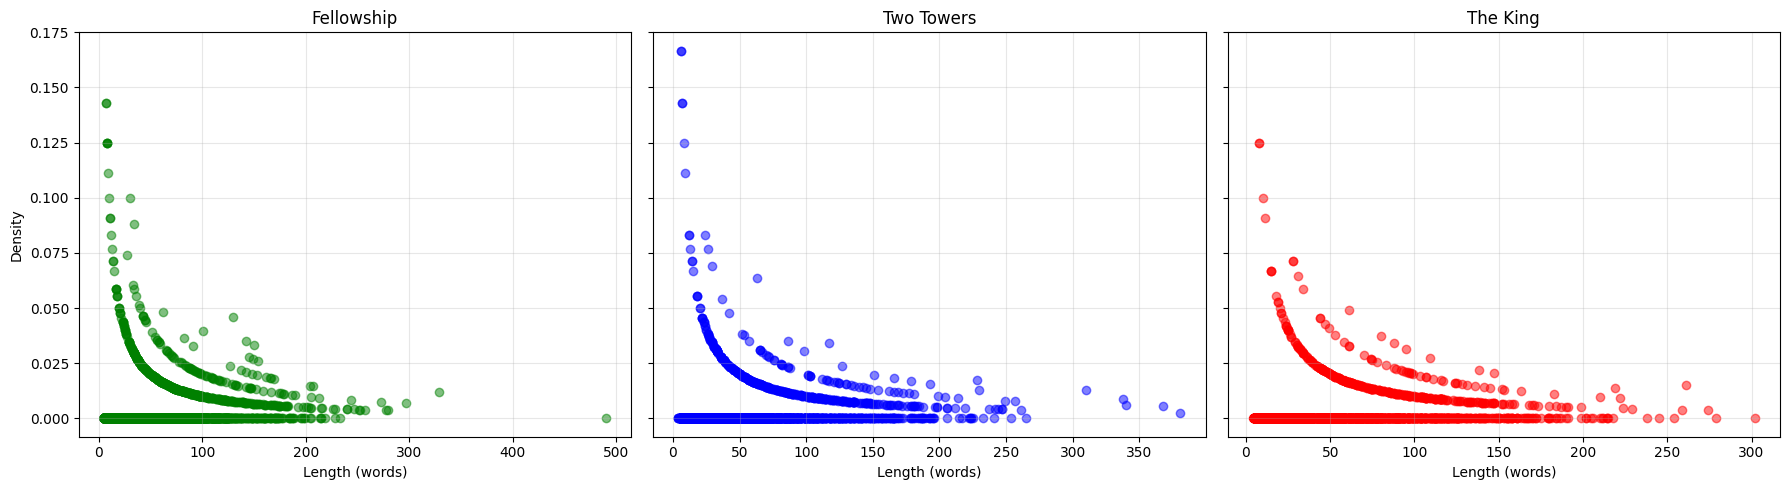

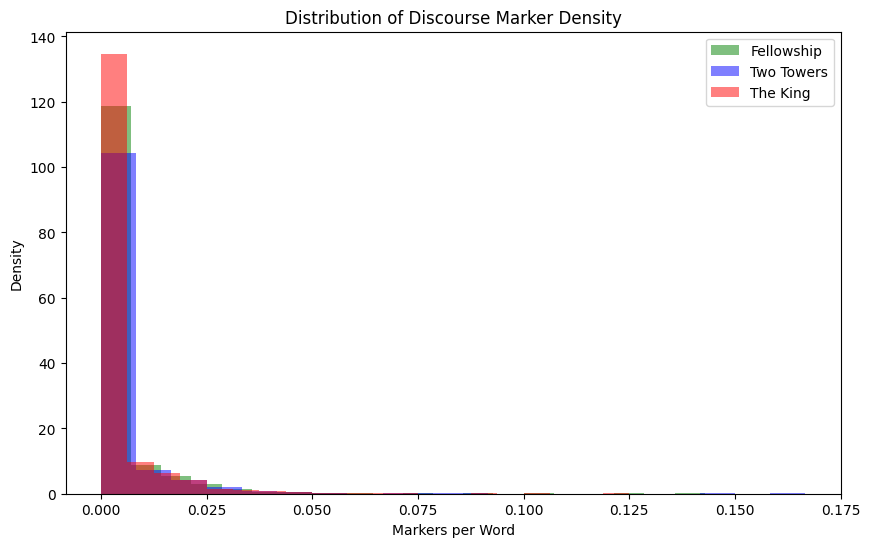

In [10]:
# --- 4. Visualization ---
# Scatter Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

axes[0].scatter(f_len, f_dens, alpha=0.5, color='green')
axes[0].set_title('Fellowship')
axes[0].set_xlabel('Length (words)')
axes[0].set_ylabel('Density')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(t_len, t_dens, alpha=0.5, color='blue')
axes[1].set_title('Two Towers')
axes[1].set_xlabel('Length (words)')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(k_len, k_dens, alpha=0.5, color='red')
axes[2].set_title('The King')
axes[2].set_xlabel('Length (words)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(f_dens, bins=20, alpha=0.5, label='Fellowship', density=True, color='green')
ax.hist(t_dens, bins=20, alpha=0.5, label='Two Towers', density=True, color='blue')
ax.hist(k_dens, bins=20, alpha=0.5, label='The King', density=True, color='red')
ax.set_title('Distribution of Discourse Marker Density')
ax.set_xlabel('Markers per Word')
ax.set_ylabel('Density')
ax.legend()
plt.show()

#### Histogram (Distribution Comparison)

**What you're seeing:**
- This shows HOW COMMON different density levels are
- **X-axis**: Marker density ranges
- **Y-axis**: How frequently that density occurs (normalized so both books are comparable)

**Key Observations:**

1. **Tall Peak Near Zero**:
   - The huge spike at the left (around 0.00) means MOST paragraphs have zero or very few markers
   - Both books are dominated by simple, direct narrative prose

2. **Long Right Tail**:
   - The gradual decline to the right shows that higher densities are increasingly rare
   - Very few paragraphs exceed 0.04 density

3. **Both Books Overlap Almost Perfectly**:
   - The blue (Wonderland) and orange (Looking-Glass) distributions are nearly identical
   - This confirms Carroll had a very consistent writing style

**What Would Be Different?**
- **Academic paper**: Would have a peak around 0.02-0.04 (much higher)
- **News article**: Peak around 0.01-0.02 (moderate)
- **Children's book (like this)**: Peak at 0.00-0.01 (low, as we see)

---

### What This Tells Us About Lewis Carroll's Writing

1. **Narrative-First Style**: Carroll focuses on storytelling through action and dialogue rather than explicit logical connections

2. **Accessible Language**: Low marker density makes the text easier to read - perfect for his young audience

3. **Consistent Voice**: Both books show identical patterns, suggesting a deliberate, polished style

4. **Strategic Marker Use**: The few high-density paragraphs likely mark important moments where Carroll wants to emphasize logical connections or contrasts

### Application to Your Own Projects

**If you're analyzing text:**
- High marker density → formal, structured, argumentative
- Low marker density → narrative, conversational, descriptive
- Use this to automatically classify text type or writing style

**If you're generating text (with AI or manually):**
- Fiction/stories: Keep density low (like Carroll)
- Explanations/tutorials: Use moderate density for clarity
- Academic/business: Use higher density for professional tone

## Memory Cleanup

If you're running low on memory, run this cell to free up RAM by deleting large variables.

In [ ]:
# Cleanup
del fellowship_text, towers_text, king_text
del fellowship_paras, towers_paras, king_paras
del f_dens, f_len, t_dens, t_len, k_dens, k_len
gc.collect()